In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
POP_CCTV = "pop_cctv_result.csv"
CRIME = "crime_in_Seoul.csv"

# 데이터 불러오기

In [4]:
import pandas as pd

df_crime_police = pd.read_csv(CRIME, thousands=",", encoding="euc-kr")
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [5]:
df_crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


# 정확한 검색을 위한 검색어 설정

In [6]:
station_name = [f"서울{name[:-1]}경찰서" for name in df_crime_police["관서명"]]
print(station_name)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


# 카카오 API 사용하기

In [29]:
# KAKAO Developer에서 발급받은 REST API Key

KAKAO_API_KEY = "REST API KEY 번호"

In [30]:
import urllib
import urllib.request
import requests

In [31]:
import json

In [32]:
KAKAO_API_URL = "https://dapi.kakao.com/v2/local/search/keyword.json"

In [39]:
# 각 경찰서의 주소를 station_address 리스트에 담아내기
station_address = []

for name in station_name:
  # 1. 검색어 인코딩
  enc_text = urllib.parse.quote(name)

  # 2. 요청 정보 생성
  request = urllib.request.Request( KAKAO_API_URL+"?query={}".format(enc_text))
  request.add_header("Authorization", "KakaoAK {}".format(KAKAO_API_KEY) )

  # 3. 요청 후 응답 받기
  response = urllib.request.urlopen(request)

  # 4. 응답 중 데이터 부분(body)만 가져오기
  response_body = response.read()
  json_dict = json.loads(response_body.decode("utf-8"))

  # 5. 필요한 부분만 가져오기 - documents
  documents = json_dict['documents']
  data = documents[0]

  address = data['address_name']

  station_address.append(address)

In [40]:
station_address

['서울 중구 저동2가 62-1',
 '서울 종로구 경운동 90-18',
 '서울 중구 남대문로5가 567',
 '서울 서대문구 미근동 165',
 '서울 종로구 인의동 48-57',
 '서울 용산구 원효로1가 12-12',
 '서울 성북구 삼선동5가 301',
 '서울 동대문구 청량리동 229',
 '서울 마포구 아현동 618-1',
 '서울 영등포구 당산동3가 2-11',
 '서울 성동구 행당동 192-8',
 '서울 동작구 노량진동 72-35',
 '서울 광진구 구의동 254-32',
 '서울 은평구 녹번동 177-15',
 '서울 강북구 번동 415-15',
 '서울 금천구 시흥동 1030',
 '서울 중랑구 신내동 810',
 '서울 강남구 대치동 998',
 '서울 관악구 봉천동 1695-5',
 '서울 강서구 화곡동 980-27',
 '서울 강동구 성내동 541-1',
 '서울 성북구 하월곡동 27-5',
 '서울 구로구 구로동 436',
 '서울 서초구 서초동 1726-1',
 '서울 양천구 신정동 321',
 '서울 송파구 가락동 9',
 '서울 노원구 하계동 250',
 '서울 서초구 방배동 455-10',
 '서울 은평구 불광동 산 24',
 '서울 도봉구 창동 17',
 '서울 강남구 개포동 14']

구 정보만 추출

In [41]:
gu_name = [addr.split()[1] for addr in station_address]
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

# 데이터 편집

In [42]:
df_crime_police["구별"] =  gu_name
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


# 구별 범죄 발생 및 검거 건수 합치기

In [43]:
import numpy as np

crime = pd.pivot_table(
    df_crime_police,
    index="구별",
    aggfunc=np.sum
)

crime.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [44]:
crime2 = df_crime_police.groupby("구별")[df_crime_police.columns[1:-1]].sum()
crime2.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
강남구,13,10,21,18,449,349,3850,1650,4284,3705
강동구,4,3,6,8,156,123,2366,789,2712,2248
강북구,7,8,14,13,153,126,1434,618,2649,2348
강서구,7,8,13,13,262,191,2096,1260,3207,2718
관악구,9,8,12,14,320,221,2706,827,3298,2642


- 범죄 발생 데이터와 범죄 검거 데이터를 조합 : 특성 조합

In [45]:
crime["강간검거율"] = crime["강간 검거"] / crime["강간 발생"] * 100
crime["강도검거율"] = crime["강도 검거"] / crime["강도 발생"] * 100
crime["살인검거율"] = crime["살인 검거"] / crime["살인 발생"] * 100
crime["절도검거율"] = crime["절도 검거"] / crime["절도 발생"] * 100
crime["폭력검거율"] = crime["폭력 검거"] / crime["폭력 발생"] * 100

del crime["강간 검거"]
del crime["강도 검거"]
del crime["살인 검거"]
del crime["절도 검거"]
del crime["폭력 검거"]

crime.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [46]:
# 컬럼의 이름을 바꾸기 위해서는 rename 함수
crime = crime.rename(
    columns={
        "강간 발생": "강간",
        "강도 발생": "강도",
        "살인 발생": "살인",
        "절도 발생": "절도",
        "폭력 발생": "폭력"
    }
)

crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


검거율 중 100이 넘어가는 데이터는 100으로 통일

In [47]:
con_list=["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

for column in con_list:
  crime.loc[crime[column]>100, column]=100

crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 정규화

- 데이터들의 단위(스케일)을 하나로 정의해 놓은 것

In [48]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링을 진행할 컬럼들
col =["강간", "강도", "살인", "절도", "폭력"]

# 스케일러 객체 생성
# MinMaxScaler: 최고 높은 수치를 1, 최고 낮은 수치를 0으로 설정해 준다.

scaler = MinMaxScaler()

# 스케일 변경
scaled_x = scaler.fit_transform(crime[col])

# 정규화된 범죄 건수가 들어 있는 새로운 데이터 프레임 생성
crime_norm = pd.DataFrame(scaled_x, columns=col, index=crime.index)
crime_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [49]:
# 검거율도 합쳐 주기

crime_norm[con_list] = crime[con_list]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


# 인구 수, CCTV 데이터와 합쳐 보기

In [50]:
pop_cctv = pd.read_csv(POP_CCTV, index_col ="구별") # csv 로딩 시에 인덱스가 될 컬럼을 미리 지정

del pop_cctv["Unnamed: 0"]
pop_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,162.948104


In [51]:
cctv_pop_col = ["인구수", "소계"]
crime_norm[["인구수", "CCTV"]] = pop_cctv[cctv_pop_col]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [52]:
crime_norm["범죄"] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [53]:
crime_norm["검거율"] = np.sum(crime_norm[con_list], axis=1)
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


# 시각화

In [54]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 576x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


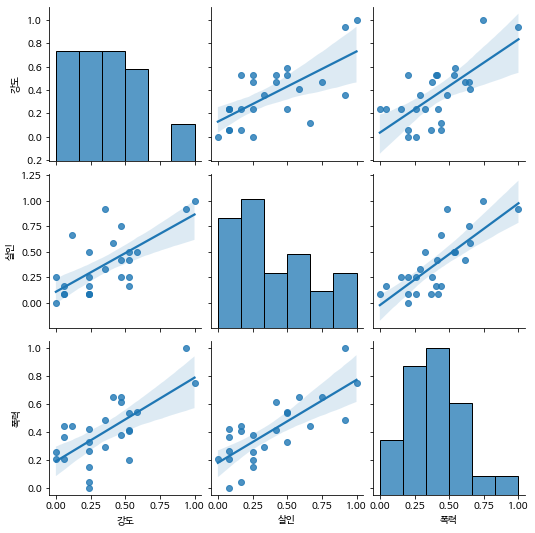

In [55]:
plt.figure(figsize=(8, 8))

sns.pairplot(
    crime_norm,
    vars=["강도", "살인", "폭력"],
    kind='reg' # 회귀선 긋기
)

plt.show()

# 인구 수와 CCTV, 범죄(종류)에 대한 상관관계

<Figure size 576x576 with 0 Axes>

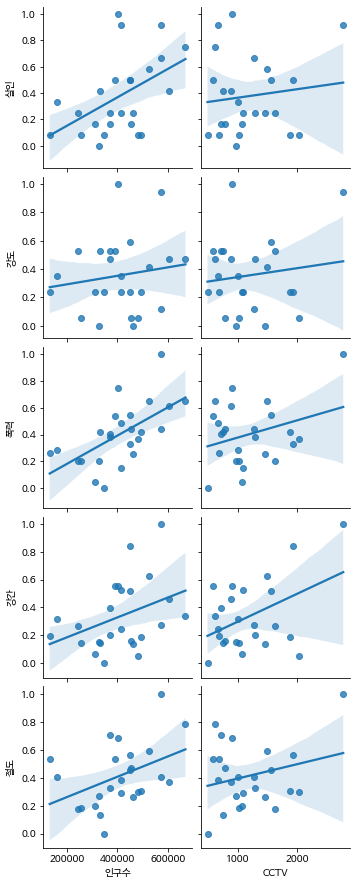

In [56]:
plt.figure(figsize=(8, 8))

sns.pairplot(
    crime_norm,
    x_vars = ["인구수", "CCTV"],
    y_vars = ["살인", "강도", "폭력", "강간", "절도"],
    kind='reg'
)

plt.show()

- 인구 수가 늘어나면 각종 범죄가 늘어납니다.
- CCTV도 늘어나면 각종 범죄가 늘어납니다.
  - 범죄가 일어나서 CCTV를 설치하는 경향 때문에

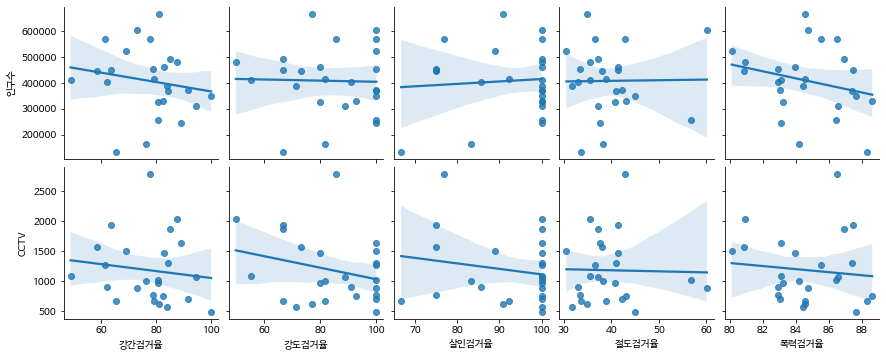

In [57]:
sns.pairplot(
    crime_norm,
    y_vars=["인구수", "CCTV"],
    x_vars=con_list,
    kind='reg'
)

plt.show()

# heatmap을 사용해서 검거율 순으로 표현

In [58]:
tmp_max = crime_norm["검거율"].max()

crime_norm["검거율"] = crime_norm["검거율"] / tmp_max *100

crime_norm_sorted = crime_norm.sort_values(by="검거율", ascending=False)
crime_norm_sorted.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


In [59]:
police_list  = con_list
police_list.append("검거율")
police_list

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거율']

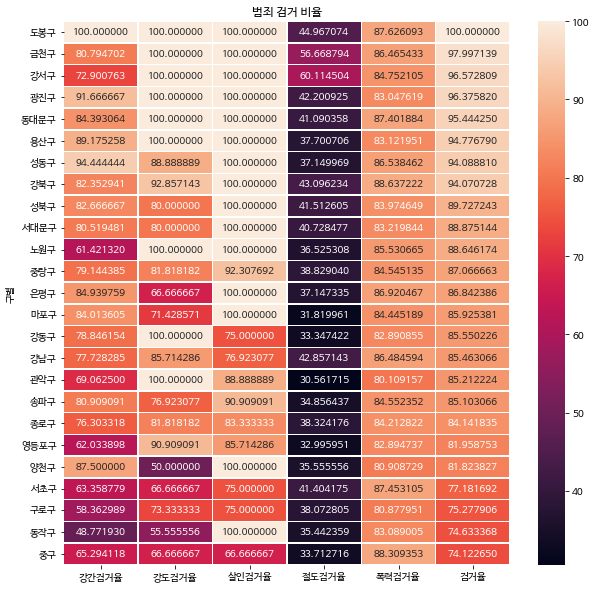

In [60]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    crime_norm_sorted[police_list],
    annot = True, # 숫자를 히트맵 위에 표시할지 여부
    fmt = 'f', # 실수 형식으로 표시
    linewidths=0.5 # 선 굵기
)

plt.title("범죄 검거 비율")
plt.show()

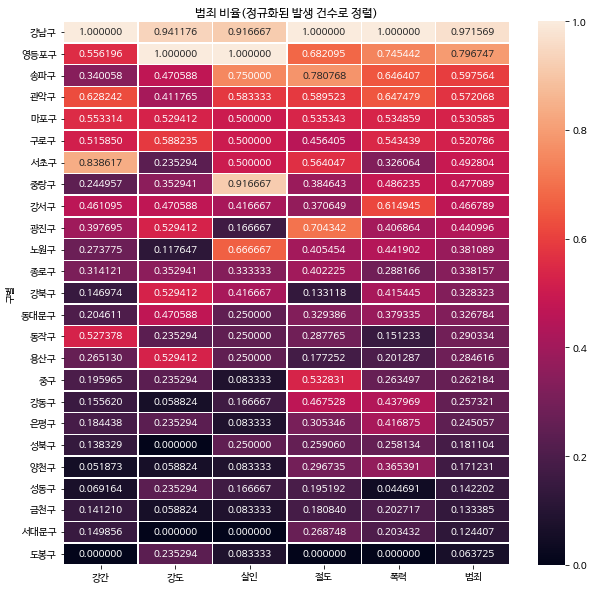

In [61]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

#범죄 평균
crime_norm['범죄'] = crime_norm['범죄'] / 5
crime_norm = crime_norm.sort_values(by='범죄', ascending=False) # 범죄 내림차순 정렬

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_norm[target_col],
    annot=True,
    fmt='f',
    linewidths = .5
)
plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
plt.show()